# EDA 02 - Preparación de los datos para Collaborative Filtering

En este notebook vamos a limpiar el fichero **ratings.csv** en el que tenemos valoraciones de películas dadas por usuarios. De esta forma, podremos elaborar un sistema de recomendación basado en las similaridades de un usuarios con otros.

In [1]:
import pandas as pd
import numpy as np

## Importación del _Dataset_

In [2]:
from dotenv import load_dotenv
import os

load_dotenv()

data_path = os.getenv("FILES_LOCATION")
FILENAME = "ratings.csv"

In [3]:
df = pd.read_csv(os.path.join(data_path, "CSV", FILENAME), low_memory=False)

Veamos cuántos usuarios han dado valoraciones:

In [4]:
df["movieId"].unique().shape

(45115,)

Hay muchísimos usuarios que han dado valoraciones. Veamos cuántos ID de películas tenemos:

In [5]:
df["userId"].unique().shape

(270896,)

## Limpieza del _Dataset_

Tenemos muchas películas y muchos usuarios. Vamos a ver las distribuciones de valoraciones de usuarios y películas para ver cómo tratar con estos datos.

In [6]:
movie = df.groupby("movieId")["rating"].count().clip(upper=9999)
user = df.groupby("userId")["rating"].count().clip(upper=199)

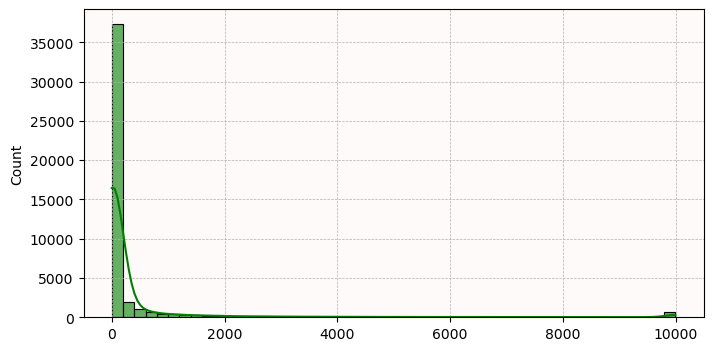

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.histplot(movie.values, kde=True, color="green", alpha=0.6, bins=50)
plt.grid(True, linestyle="--", linewidth=0.5)
plt.gca().set_facecolor("snow")

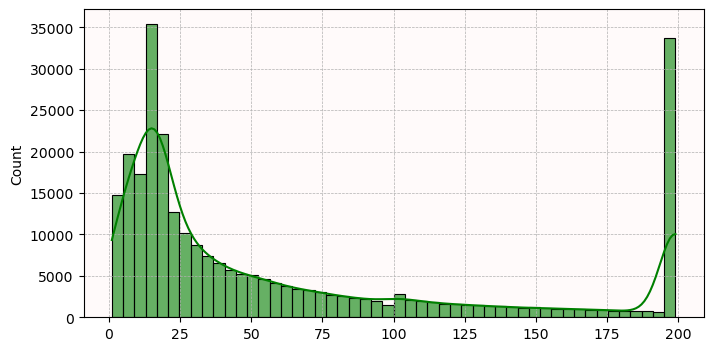

In [8]:
plt.figure(figsize=(8, 4))
sns.histplot(user.values, kde=True, color="green", alpha=0.6, bins=50)
plt.grid(True, linestyle="--", linewidth=0.5)
plt.gca().set_facecolor("snow")

La gran mayoría de películas tiene pocas valoraciones dadas y vemos que la mayoría de usuarios da relativamente pocas valoraciones. Por ello, vamos a filtrar nuestro _dataset_ de tal forma que tengamos mucha menos dispersión en los datos.

In [9]:
min_movie_ratings = 1000
filter_movies = (df["movieId"].value_counts() > min_movie_ratings)
filter_movies = filter_movies[filter_movies].index.tolist()

min_user_ratings = 200
filter_users = (df["userId"].value_counts() > min_user_ratings)
filter_users = filter_users[filter_users].index.tolist()

df_filtered = df[(df["movieId"].isin(filter_movies)) & (df["userId"].isin(filter_users))]

del filter_movies, filter_users, min_movie_ratings, min_user_ratings
print(f"Shape User-Ratings unfiltered:\t{df.shape}")
print(f"Shape User-Ratings filtered:\t{df_filtered.shape}")
print(f"Unique Users unfiltered:\t{df.userId.unique().shape}")
print(f"Unique Users filtered:\t{df_filtered.userId.unique().shape}")
print(f"Unique Movies unfiltered:\t{df.movieId.unique().shape}")
print(f"Unique Movies filtered:\t{df_filtered.movieId.unique().shape}")

Shape User-Ratings unfiltered:	(26024289, 4)
Shape User-Ratings filtered:	(13509634, 4)
Unique Users unfiltered:	(270896,)
Unique Users filtered:	(32811,)
Unique Movies unfiltered:	(45115,)
Unique Movies filtered:	(3744,)


In [10]:
df_filtered.to_csv(os.path.join(data_path, "CSV", "cleaned_ratings.csv"), index=False)

Tras filtrar los datos vemos que solamente se recomendarían 3744 películas del total de películas.